# Bangalore house price prediction

In [1]:
# importing the packages
import pandas as pd
import numpy as np
import math as m
import seaborn as sns

In [2]:
# reading the data file
def read_data():
    data=pd.read_csv("C:/Top/bangalore house price prediction OHE-data.csv ")
    return data

In [3]:
# calling the function
data= read_data()
print(data.head())

   bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
0   3.0      2.0  150.0          1672.0    3     8971.291866   
1   3.0      3.0  149.0          1750.0    3     8514.285714   
2   3.0      2.0  150.0          1750.0    3     8571.428571   
3   2.0      2.0   40.0          1250.0    2     3200.000000   
4   2.0      2.0   83.0          1200.0    2     6916.666667   

   area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                              1                        0   
1                              0                        1   
2                              1                        0   
3                              1                        0   
4                              0                        0   

   area_typePlot  Area  availability_Ready To Move  ...  \
0                    0                           1  ...   
1                    0                           1  ...   
2                    0                           1  ...   
3           

In [4]:
data.shape

(7120, 108)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB
None


In [6]:
df=data[(data["balcony"]==0)|(data["balcony"]==1) |(data["balcony"]==2)|(data["balcony"]==3)]

In [7]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

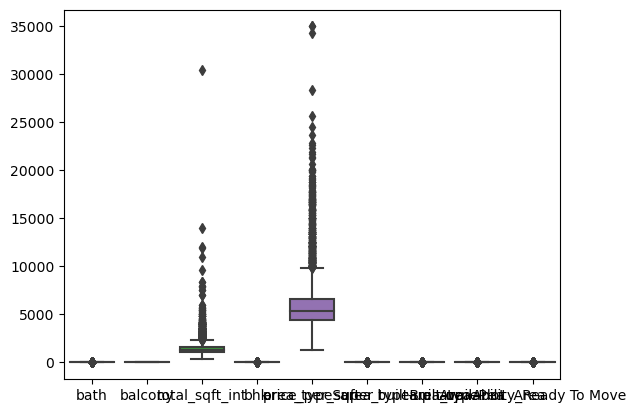

In [9]:
#Exploratory Data Analysis
# checking the outliers
sns.boxplot(data=df.loc[:, ['bath', 'balcony', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area', 
                             'area_typePlot  Area', 'availability_Ready To Move']])

<Axes: xlabel='bhk', ylabel='count'>

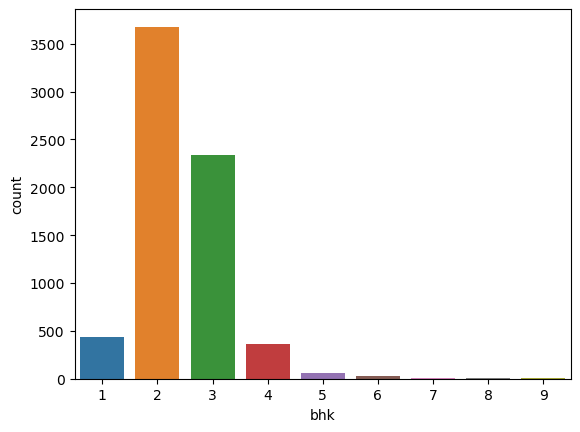

In [12]:
sns.countplot(x="bhk",data=df)

In [14]:
# model building
X=df[['bath', 'balcony', 'total_sqft_int', 'bhk','price_per_sqft','area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area', 'availability_Ready To Move']]
y=df['price']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [18]:
def train_test(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=1234)
    print(X_train.shape),print(y_train.shape)
    print(X_test.shape),print(y_test.shape)
    return  X_train,X_test,y_train,y_test

In [19]:
X_train,X_test,y_train,y_test=train_test(X,y)

(1383, 9)
(1383,)
(5535, 9)
(5535,)


In [23]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
def modelling(X_train,y_train,X_test):
    model=KNeighborsRegressor(n_neighbors=22)
    model_train=model.fit(X_train,y_train)
    pred=model_train.predict(X_test)
    return pred

In [24]:
pred=modelling(X_train,y_train,X_test)
print(pred)

[94.51636364 52.18318182 20.14909091 ... 68.80636364 58.18954545
 58.92045455]


In [25]:
r2_score(y_test,pred)

0.5497557735517052

In [27]:
m.sqrt(mean_squared_error(y_test,pred))

75.12953897320939

In [28]:
mean_absolute_error(y_test,pred)

10.85929896526238

In [34]:
(len(df))

6918

In [36]:
from math import sqrt
sqrt((len(df)))

83.17451532771321

In [37]:
error_rate=[]
for i in range(1,100):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(1-r2_score(y_test,pred_i))
error_rate

[0.2940620549755335,
 0.3159809009018346,
 0.3277821162196193,
 0.3285880326061188,
 0.3483531573357733,
 0.3609321836015782,
 0.3629532816949187,
 0.36551128924157816,
 0.3767841297930927,
 0.3892850868604709,
 0.3990187673778107,
 0.4044159457235368,
 0.4116340054055858,
 0.4171094414333376,
 0.4218912905184602,
 0.42558126883595926,
 0.42971725528993243,
 0.43522781459492077,
 0.43824179722678736,
 0.4423201743740983,
 0.4473028312125562,
 0.45024422644829476,
 0.45489581135533763,
 0.45913661179372345,
 0.46296413842658946,
 0.4656322104270455,
 0.46811956088161377,
 0.46997477213181527,
 0.4722191654537058,
 0.4750290480235725,
 0.47816692225457524,
 0.4808445288367338,
 0.4828320253295322,
 0.4847988867405937,
 0.48629838828518923,
 0.4890875855360647,
 0.4921039407121479,
 0.4952017388918786,
 0.49752636563679253,
 0.49995882450822016,
 0.502403754314477,
 0.5045291946568742,
 0.5065510978774974,
 0.5096452901583675,
 0.5119904002534791,
 0.5147918332291144,
 0.5176789739826593,

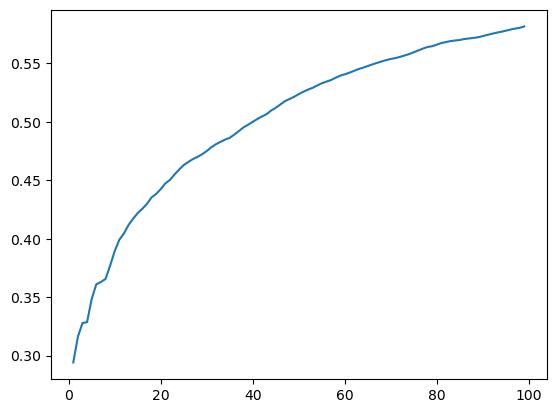

In [39]:
import matplotlib.pyplot as plt
plt.plot(range(1,100),error_rate)